# 1. Getting Started 
We'll begin by importing pandas, numpy, matplotlib, and seaborn to make this EDA as vibrant and effective as possible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

# 2. Importing and Understanding The DataSet

After importing the .csv file, we will use df.head to see the columns and first 5 values in our dataset.

Understanding given data is the first step towards creating an analysis that means something and tells a story.

In [2]:
df = pd.read_csv('online_gaming_behavior_dataset.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [4]:
df.shape

(40034, 13)

This dataset contains 13 columns and 40034 rows. We need to clean the data of any duplicates, null values, or any irregularities it may have.

Additionally, I dislike how the columns are named so we'll be changing them into easier-to-read formats.

# 3. Cleaning The DataSet

### a. Checking for null values
We'll be checking to see if any cell is empty. 
### b. Checking for duplicates
We'll be checking for duplicate rows and make sure they dont taint the end visualization. 
### c. Renaming columns
Columns will be renamed into simpler formats.
### d. Rounding up PlayTimeHours column
The PlayTimeHours column contains values up to 6 decimal points which will unnecessarily complicate the data in my view. So for this project we'll be rounding them up.

> #### Checking for Null Values
Checking for null values is a crucial step in the data-cleaning process during exploratory data analysis (EDA). We can use the pandas library to easily identify and handle missing values in our DataFrame.

In [5]:
df.isnull()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,False,False,False,False,False,False,False,False,False,False,False,False,False
40030,False,False,False,False,False,False,False,False,False,False,False,False,False
40031,False,False,False,False,False,False,False,False,False,False,False,False,False
40032,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

> Great! There are no null values so we can move to check for duplicates.

> #### Checking for duplicates
>Checking for duplicates is essential so that the end data doesn't get tainted. We'll be using 'duplicated' to check for duplicate rows and 'sum' to count the number of duplicate rows, if any.

In [7]:
# Check for duplicate rows

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
40029    False
40030    False
40031    False
40032    False
40033    False
Length: 40034, dtype: bool

In [8]:
df.loc[df.duplicated()]

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel


>Evidently there are no duplicates in the dataset. We next move to Renaming columns.

#### Renaming columns
>For a simpler reading experience we will be introducing spaces and making additional changes.
>This isn't necessary as the columns are well labeled but is a preference. 

In [9]:
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [10]:
df.rename(columns = {'PlayerID':'Player ID','GameGenre':'Game Genre', 'PlayTimeHours':'Play Time in Hrs', 'InGamePurchases':'In-Game Purchases', 'GameDifficulty':'Difficulty', 'SessionsPerWeek': 'Sessions Per Week', 'AvgSessionDurationMinutes':'Avg Session Duration in Minutes','PlayerLevel':'Player Level', 'AchievementsUnlocked' : 'Achievements Unlocked', 'EngagementLevel' : 'Engagement Level'})

,Player ID,Age,Gender,Location,Game Genre,Play Time in Hrs,In-Game Purchases,Difficulty,Sessions Per Week,Avg Session Duration in Minutes,Player Level,Achievements Unlocked,Engagement Level
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [11]:
df = df.rename(columns = {'PlayerID':'Player ID','GameGenre':'Game Genre', 'PlayTimeHours':'Play Time in Hrs', 'InGamePurchases':'In-Game Purchases', 'GameDifficulty':'Difficulty', 'SessionsPerWeek': 'Sessions Per Week', 'AvgSessionDurationMinutes':'Avg Session Duration in Minutes','PlayerLevel':'Player Level', 'AchievementsUnlocked' : 'Achievements Unlocked', 'EngagementLevel' : 'Engagement Level'})

In [12]:
df.columns

Index(['Player ID', 'Age', 'Gender', 'Location', 'Game Genre',
       'Play Time in Hrs', 'In-Game Purchases', 'Difficulty',
       'Sessions Per Week', 'Avg Session Duration in Minutes', 'Player Level',
       'Achievements Unlocked', 'Engagement Level'],
      dtype='object')

#### Rounding up PlayTimeHours column

>We can round up the values by 2 methods, we can either use numpy library's ceil function or we can simply change the data type from float64 to integer, to begin with.

>Using the ceil function gives us values like 16.0 or 5.0 as the data type is still a float.

>I'll still be changing the data type after.

In [13]:
df.dtypes

Player ID                            int64
Age                                  int64
Gender                              object
Location                            object
Game Genre                          object
Play Time in Hrs                   float64
In-Game Purchases                    int64
Difficulty                          object
Sessions Per Week                    int64
Avg Session Duration in Minutes      int64
Player Level                         int64
Achievements Unlocked                int64
Engagement Level                    object
dtype: object

In [14]:
df['Play Time in Hrs'] = np.ceil(df['Play Time in Hrs']) 
df.head()

,Player ID,Age,Gender,Location,Game Genre,Play Time in Hrs,In-Game Purchases,Difficulty,Sessions Per Week,Avg Session Duration in Minutes,Player Level,Achievements Unlocked,Engagement Level
0,9000,43,Male,Other,Strategy,17.0,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,6.0,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,9.0,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,6.0,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,16.0,0,Medium,2,131,95,37,Medium


In [15]:
df.dtypes

Player ID                            int64
Age                                  int64
Gender                              object
Location                            object
Game Genre                          object
Play Time in Hrs                   float64
In-Game Purchases                    int64
Difficulty                          object
Sessions Per Week                    int64
Avg Session Duration in Minutes      int64
Player Level                         int64
Achievements Unlocked                int64
Engagement Level                    object
dtype: object

In [16]:
df['Play Time in Hrs'] = df['Play Time in Hrs'].astype(int)

In [17]:
df.dtypes

Player ID                           int64
Age                                 int64
Gender                             object
Location                           object
Game Genre                         object
Play Time in Hrs                    int32
In-Game Purchases                   int64
Difficulty                         object
Sessions Per Week                   int64
Avg Session Duration in Minutes     int64
Player Level                        int64
Achievements Unlocked               int64
Engagement Level                   object
dtype: object

In [18]:
df.head()

,Player ID,Age,Gender,Location,Game Genre,Play Time in Hrs,In-Game Purchases,Difficulty,Sessions Per Week,Avg Session Duration in Minutes,Player Level,Achievements Unlocked,Engagement Level
0,9000,43,Male,Other,Strategy,17,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,6,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,9,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,6,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,16,0,Medium,2,131,95,37,Medium


>#### Cleaned The DataSet 

### 4. Analysis and Visualisation

>Next we move to analysis and visualisation.
>We'll be creating several meaningful and aesthetic visualizations using Matplotlib and Seaborn and derive conclusions from the output.

> i. Distribution of Player Ages
> 
> ii. Gender Distribution
> 
> iii. Play Time put in by Respective Genders
> 
> iv. Play Time by Game Genre
>
> v. Heatmap for the Correlation Between Gender and Game Genre¶
>
> vi. Average Session Duration vs. Engagement Level
>
> vii. Correlation Heatmap:
>
> viii. Player Level Distribution by Gender
>
> ix. Sessions Per Week by Difficulty Level
>
> x. Gender Distribution Within Each Game Genre

#### i. Distribution of Player Ages
> We'll be plotting a Histogram and an KDE for the Distribution of Player Ages: 

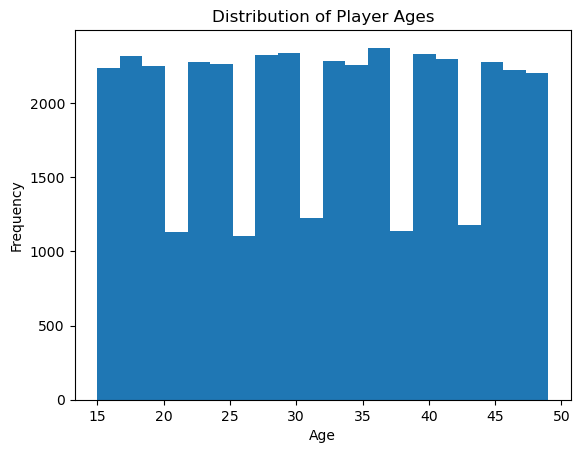

In [19]:
# Histogram for Distribution of Player Ages
ax = df['Age'].plot(kind='hist', bins=20, title = 'Distribution of Player Ages')
ax.set_xlabel('Age') 

plt.show()

> #### Conclusion:
> The age distribution of players is relatively uniform across the age ranges from 15 to 50.
There are no significant spikes or dips in any particular age range, indicating a balanced age distribution among the players.

#### ii. Gender Distribution:
> We'll be using countplot to visualise the gender distribution from the dataset.

In [20]:
print(df['Gender'].tolist().count('Female'))

16075


In [21]:
print(df['Gender'].tolist().count('Male'))

23959


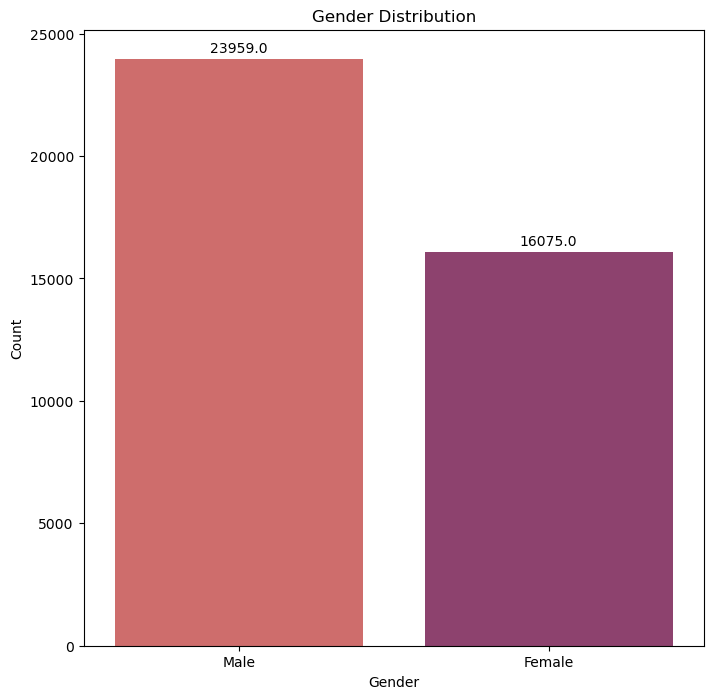

In [22]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(data=df, x='Gender', palette='flare')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate the bars with the count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

plt.show()

> #### Conclusion:
> The gender distribution shows a higher number of male players (23,959) compared to female players (16,075). This indicates that while the game is popular among both genders, it is more so among males. The difference suggests potential areas for targeted marketing or game design to attract more female players and balance the gender distribution.

>#### iii. Play Time put in by Respective Genders

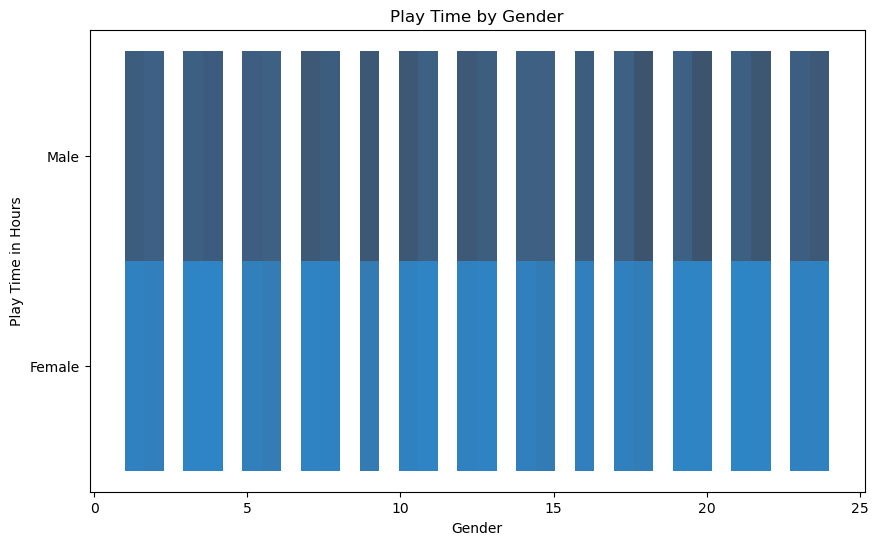

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y='Gender', x='Play Time in Hrs')
plt.title('Play Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Play Time in Hours')
plt.show()

>#### Conclusion:
>The histogram shows the distribution of playtime hours segmented by gender.
>
>The distribution of playtime among females is spread across the segments, with a notable concentration in the lower playtime ranges. This suggests that a significant portion of female players tends to play fewer hours.
>
>
>The distribution of playtime among males is also spread across the segments, but there is a noticeable presence in higher playtime ranges. This indicates that a larger proportion of male players engage in longer play sessions compared to female players.
>
>These observations highlight gender differences in gaming behavior, with males showing a tendency for longer playtime compared to females.

#### iv. Play Time by Game Genre:

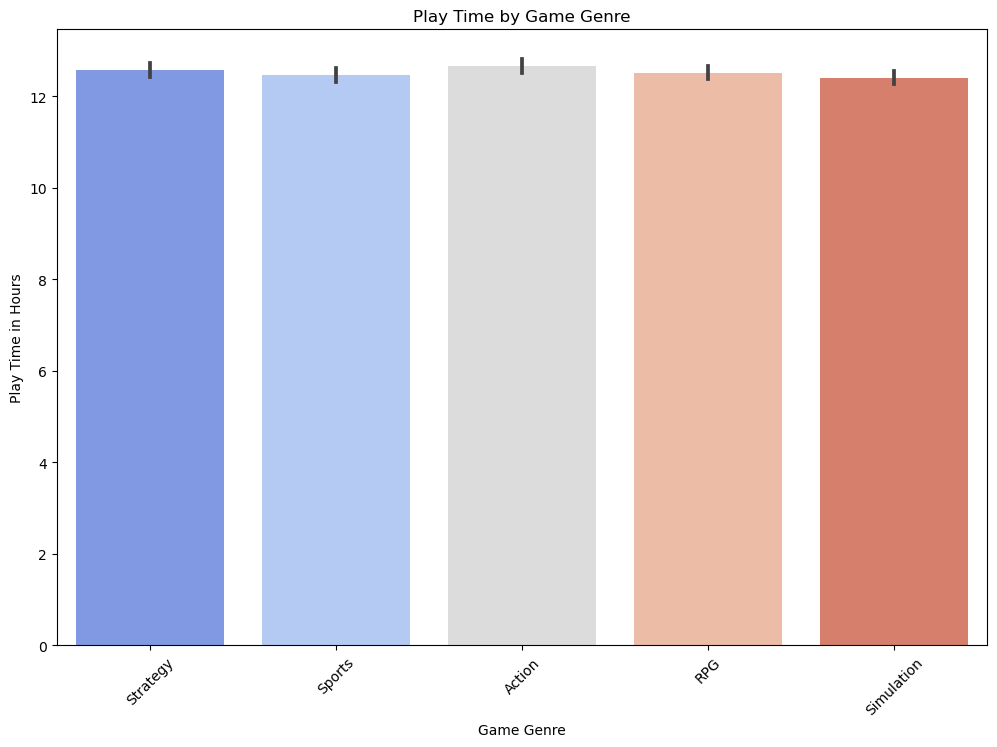

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Game Genre', y='Play Time in Hrs', palette='coolwarm')
plt.title('Play Time by Game Genre')
plt.xlabel('Game Genre')
plt.xticks(rotation=45)
plt.ylabel('Play Time in Hours')

plt.show()

>#### Conclusion
>We can see that the Action Genre is the most played followed by Strategy, Sports, RPG and Simulation. This analysis suggests that action and strategy games are the most engaging genres in terms of playtime.

#### v. Heatmap for the Correlation Between Gender and Game Genre
Heatmaps are ideal for displaying the distribution of numerical data across two categorical variables, enabling quick visual comparison. The gradient color scale effectively highlights areas with higher or lower values.

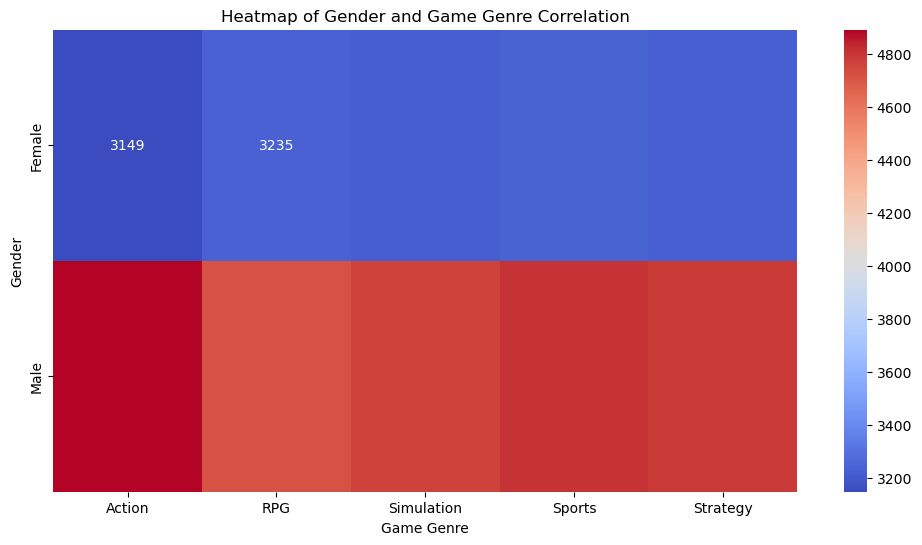

In [25]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Game Genre'])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Gender and Game Genre Correlation')
plt.xlabel('Game Genre')
plt.ylabel('Gender')
plt.show()

>#### Conclusion
>This heatmap shows the correlation between gender (Male and Female) and different game genres (Action, RPG, Simulation, Sports, Strategy).
>
>The lower half of the heatmap (male) is more saturated in red, indicating a higher number of male players across all game genres compared to females.
>
>In contrast, the blue hues in the upper half suggest fewer female players, though they show a notable presence in Action and RPG genres with counts like 3149 and 3235, respectively.
>
>The primary takeaway is that males are more prevalent in online gaming, with females showing particular interest in specific genres like Action and RPG.

#### vi. Average Session Duration vs. Engagement Level:

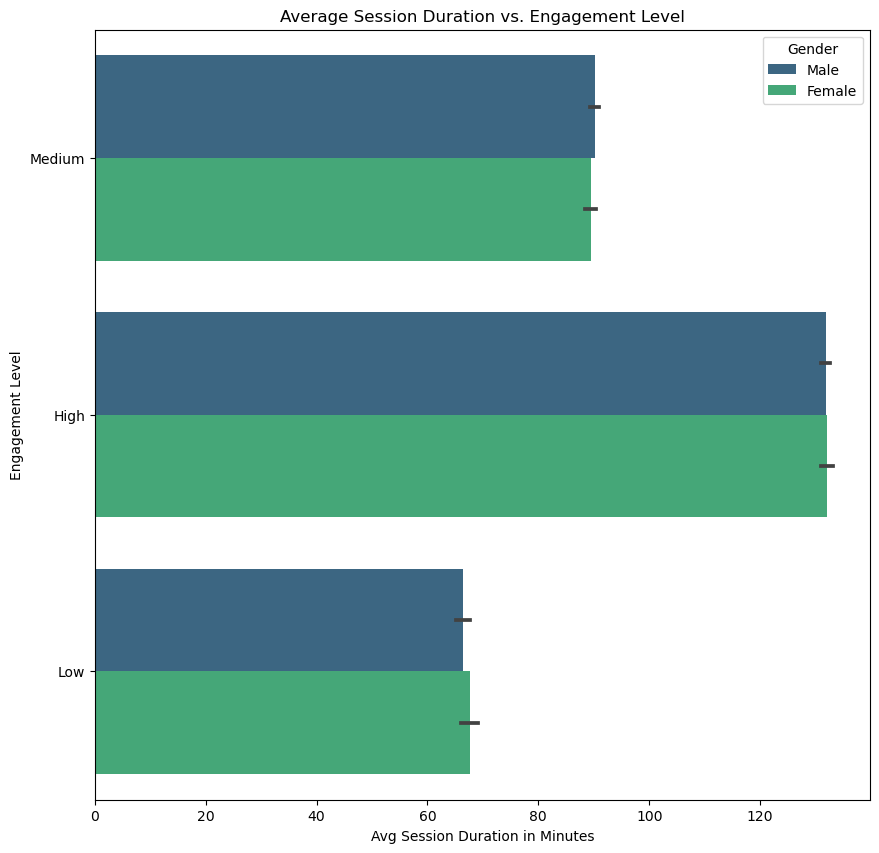

In [26]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df, x='Avg Session Duration in Minutes', y='Engagement Level', hue='Gender', palette='viridis')
plt.title('Average Session Duration vs. Engagement Level')
plt.xlabel('Avg Session Duration in Minutes')
plt.ylabel('Engagement Level')
plt.show()

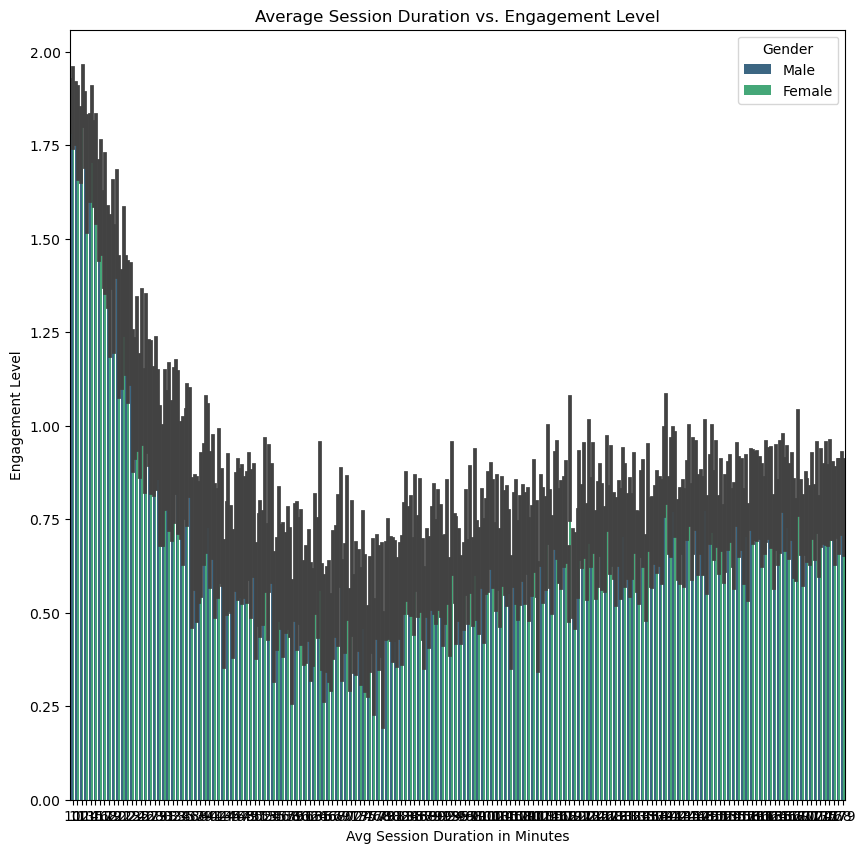

In [42]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df, x='Avg Session Duration in Minutes', y='Engagement Level', hue='Gender', palette='viridis')
plt.title('Average Session Duration vs. Engagement Level')
plt.xlabel('Avg Session Duration in Minutes')
plt.ylabel('Engagement Level')
plt.show()

>#### Conclusion
>The engagement level is higher for shorter session durations, which decreases as the session duration increases.
>
>The bars show that male players have a consistently higher engagement level compared to female players across all session durations.
>
> The choice of a bar chart is suitable here as it allows for a clear comparison of engagement levels between genders over varying session durations, making it easy to identify specific patterns and trends.
>
>The main conclusion is that shorter gaming sessions are more engaging for both genders, with males displaying higher overall engagement.

C:\Users\saksh\AppData\Local\Temp\ipykernel_65612\3743603135.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Engagement Level', y='Avg Session Duration in Minutes', jitter=True, palette='Set1')


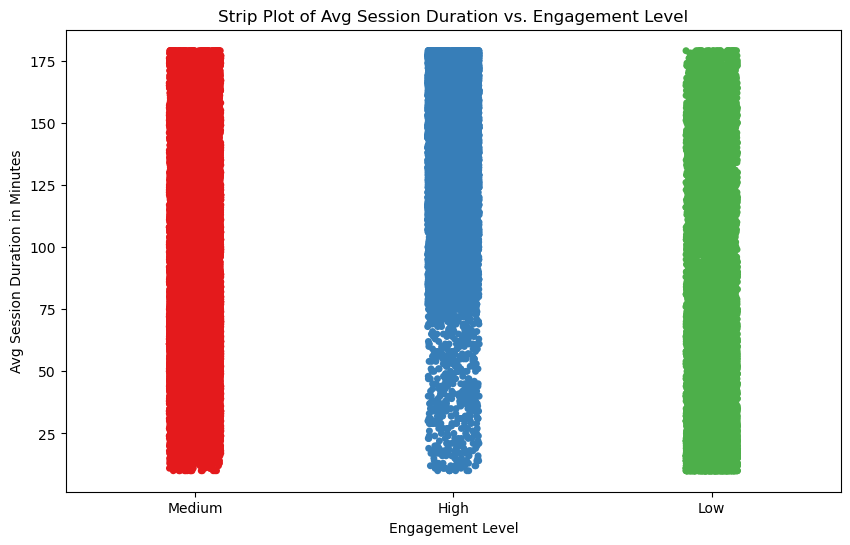

In [28]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Engagement Level', y='Avg Session Duration in Minutes', jitter=True, palette='Set1')
plt.title('Strip Plot of Avg Session Duration vs. Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Avg Session Duration in Minutes')
plt.show()

>From this plot, we observe that session durations range from approximately 25 to 175 minutes across all engagement levels. Notably, medium engagement users show a balanced distribution of session durations along the entire range, indicating that they consistently engage for varying lengths of time. High engagement users, however, tend to cluster in the lower half of the duration range (25 to 100 minutes), suggesting that these users might engage more frequently but for shorter sessions.

>These insights are crucial for understanding player demographics and behavior, which can guide game development and marketing strategies to better target specific segments and enhance user engagement.

In [29]:
df.columns

Index(['Player ID', 'Age', 'Gender', 'Location', 'Game Genre',
       'Play Time in Hrs', 'In-Game Purchases', 'Difficulty',
       'Sessions Per Week', 'Avg Session Duration in Minutes', 'Player Level',
       'Achievements Unlocked', 'Engagement Level'],
      dtype='object')

<Axes: xlabel='Play Time in Hrs', ylabel='Player Level'>

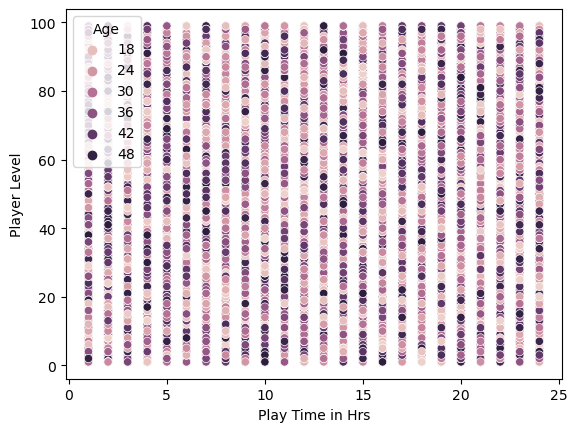

In [30]:
sns.scatterplot(x='Play Time in Hrs', y='Player Level', hue='Age', data= df)

>#### Conclusion
>This chart reveals a clear positive correlation between play time and player level: as players spend more time playing, their levels increase.
>
>The age distribution shows that players of all ages are spread across different play times and levels, with no significant age-related trend apparent. Younger players (lighter bubbles) and older players (darker bubbles) both achieve high play times and levels, suggesting that age does not significantly impact the ability to reach higher levels or play for extended periods.
>
>The bubble plot was chosen for its ability to simultaneously display three dimensions of data (play time, player level, and age), making it easier to identify patterns and relationships among these variables.

#### vii. Correlation Heatmapp: Engagement Level vs Avg Session Duration in Minutes

In [31]:
# Convert non-numeric values to numeric
# For example, you might encode 'Medium' as 1, 'High' as 2, etc.
# Here, we use pandas' factorize method to convert categorical variables to numeric codes
df['Engagement Level'], _ = pd.factorize(df['Engagement Level'])

# Ensure 'AvgSessionDurationMinutes' is numeric
df['Avg Session Duration in Minutes'] = pd.to_numeric(df['Avg Session Duration in Minutes'], errors='coerce')

# Drop rows with NaN values resulting from conversion errors
df = df.dropna(subset=['Avg Session Duration in Minutes', 'Engagement Level'])

In [32]:
# Subset the DataFrame with the desired columns
subset_df = df[['Avg Session Duration in Minutes', 'Engagement Level']]


In [33]:
# Compute the correlation matrix
corr = subset_df.corr()

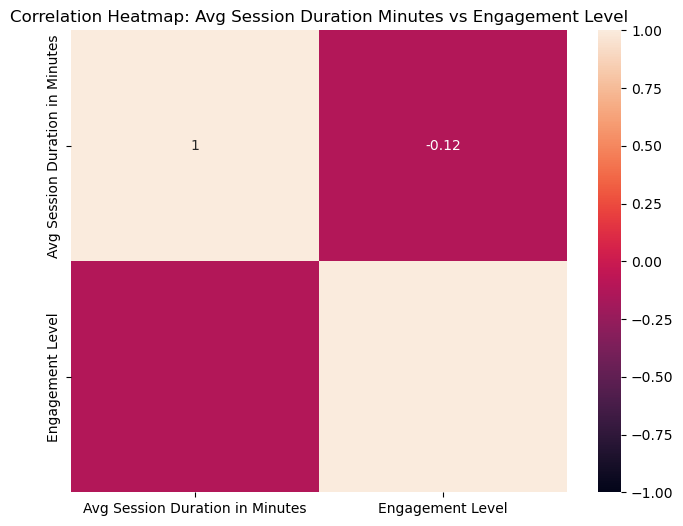

In [34]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Avg Session Duration Minutes vs Engagement Level')
plt.show()

>#### Conclusion
>This suggests that as engagement level increases, the average session duration slightly decreases, but the relationship is not strong enough to be considered significant. The weak correlation implies that engagement level alone is not a strong predictor of session duration, pointing to the possibility that other factors might be more influential in determining how long users engage in sessions. 

#### viii. Player Level Distribution by Gender

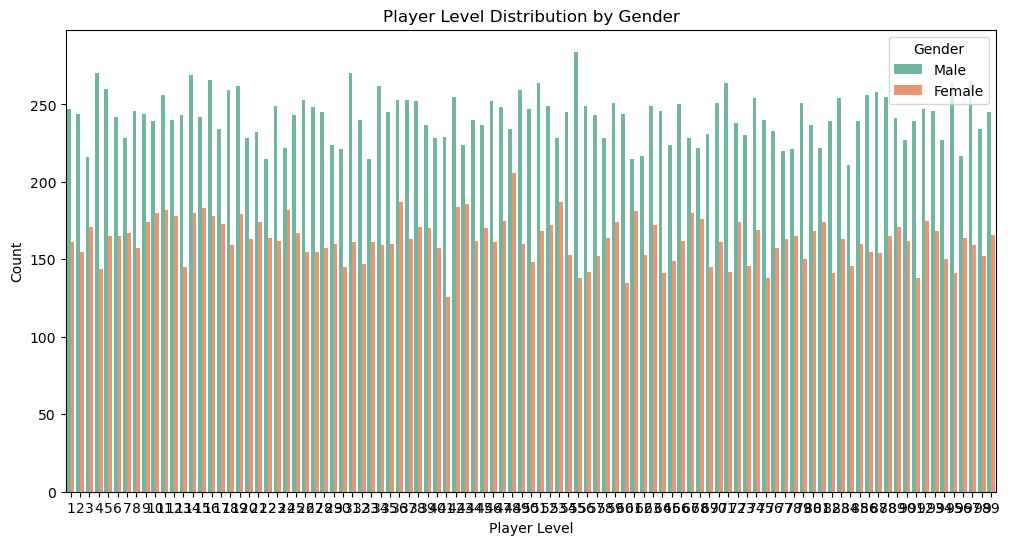

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Player Level', hue='Gender', palette='Set2')
plt.title('Player Level Distribution by Gender')
plt.xlabel('Player Level')
plt.ylabel('Count')
plt.show()

>#### Conclusion:
>The distribution of player levels shows that males and females are fairly evenly distributed across all levels, although males have a slightly higher count at most levels. This indicates a balanced engagement from both genders, with a slight male dominance in player levels.

In [36]:
# Create a new column for binned player levels
bins = range(0, df['Player Level'].max() + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df['Player Level Binned'] = pd.cut(df['Player Level'], bins=bins, labels=labels, right=False)

In [37]:
df.columns

Index(['Player ID', 'Age', 'Gender', 'Location', 'Game Genre',
       'Play Time in Hrs', 'In-Game Purchases', 'Difficulty',
       'Sessions Per Week', 'Avg Session Duration in Minutes', 'Player Level',
       'Achievements Unlocked', 'Engagement Level', 'Player Level Binned'],
      dtype='object')

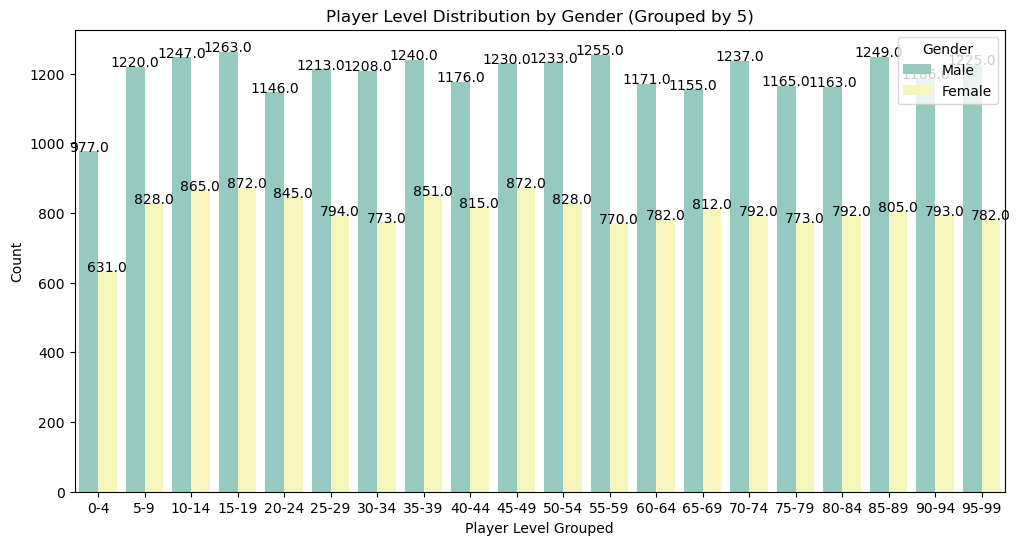

In [38]:
# Plot the binned player levels by gender
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Player Level Binned', hue='Gender', palette='Set3')
plt.title('Player Level Distribution by Gender (Grouped by 5)')
plt.xlabel('Player Level Grouped')
plt.ylabel('Count')

# Annotate the bars with the count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 3), 
                textcoords='offset points')

>#### Conclusion:
>Grouping player levels in segments of five still shows that males generally outnumber females across all grouped levels. The counts are highest in the mid-range levels (15-49), suggesting that both genders tend to advance to these levels in greater numbers.

#### ix. Sessions Per Week by Difficulty Level

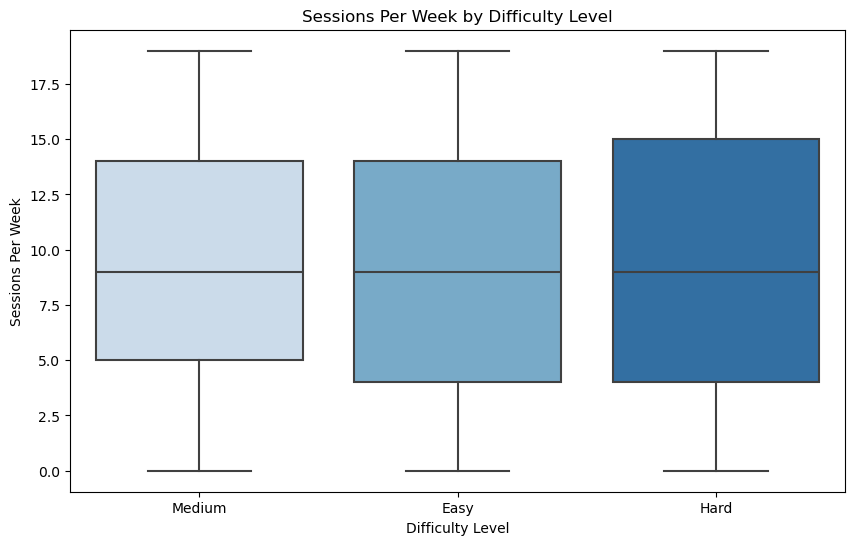

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Difficulty', y='Sessions Per Week', palette='Blues')
plt.title('Sessions Per Week by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Sessions Per Week')
plt.show()

>#### Conclusion:
>The box plot indicates that the median sessions per week are similar across different difficulty levels, with a slight increase for harder levels. The range of sessions per week is also similar, but players engaging in hard difficulty levels show slightly higher maximum sessions per week.

#### x. Gender Distribution Within Each Game Genre

In [40]:
# Group by 'GameGenre' and 'Gender' and count occurrences
gender_distribution = df.groupby(['Game Genre', 'Gender']).size().unstack()

<Figure size 1200x800 with 0 Axes>

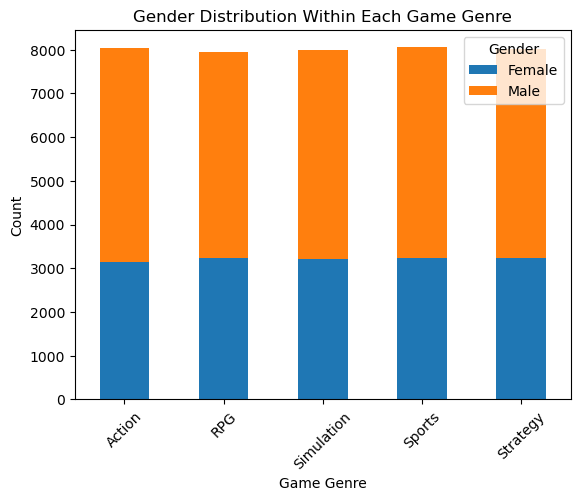

In [41]:
# Plot the distribution
plt.figure(figsize=(12, 8))
gender_distribution.plot(kind='bar', stacked=True)
plt.title('Gender Distribution Within Each Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

>#### Conclusion
>This suggests that both males and females are attracted to a variety of game genres. The consistency in the male-to-female ratio across different genres indicates that the gaming platform is equally appealing to both genders regardless of the game type.

## Final Conclusions and Business Insights

>### 1. Distribution of Player Ages
>#### Observation:
>The age distribution of players is fairly even, with players aged 15 to 50 showing a consistent presence.
>#### Business Insight:
>Targeting marketing campaigns across all age groups can be beneficial, but focusing on ages 15-50 will likely yield the most engagement due to the even distribution.
>
>### 2. Play Time by Gender
>#### Observation:
>Both male and female players have a wide range of playtimes, with no significant difference between genders.
>#### Business Insight:
>Marketing efforts and game content can be equally tailored to both genders, as they spend similar amounts of time playing games.
>
>### 3. Play Time by Game Genre
>#### Observation:
>Action games have the highest playtime, followed by strategy, sports, RPG, and simulation.
>#### Business Insight:
>Investing in action and strategy games might provide the highest return, given their higher engagement levels. Promotional efforts and in-game monetization strategies should prioritize these genres.
>
>### 4. Player Level Distribution by Gender
>#### Observation:
>Both male and female players are distributed relatively evenly across player levels, with no significant gender bias.
>#### Business Insight:
>Player progression systems and rewards should be designed to appeal equally to both genders, as there is no significant difference in progression rates.
>
>### 5. Sessions Per Week by Difficulty Level
>####Observation: Players engage in a similar number of sessions per week regardless of game difficulty, with a slight increase for harder levels.
>####Business Insight: Offering various difficulty levels can cater to a broad audience. Games should include multiple difficulty settings to maintain player engagement across different skill levels.
>
>### 6. Gender Distribution Within Each Game Genre
>#### Observation:
>The gender distribution within each game genre is relatively balanced, with a slight male dominance.
>#### Business Insight:
>Game genres do not show significant gender preference. Therefore, game development and marketing strategies can be designed to be gender-neutral, ensuring broad appeal.
>

>## Overall Business Insights:
>
>Balanced Gender Appeal: Games and marketing campaigns should be gender-neutral, as both genders show similar engagement across different metrics.
Age Group Targeting: Focus marketing efforts on players aged 15-50 to maximize reach and engagement.
>
>Invest in Popular Genres: Prioritize action and strategy genres for higher player engagement and potential revenue.
>
>Difficulty Levels: Offer various difficulty settings to cater to players of different skill levels, ensuring broader appeal and sustained engagement.
>
>Progression and Rewards: Design progression systems and reward structures that appeal to a diverse player base, ensuring engagement across different player levels.
